### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data

In [2]:
df = pd.read_csv("C:/Users/joelk/automated-review-rating-system/data/Kaggle Datasets/Amazon_Unlocked_Mobile.csv")

### Data Informations & Structure

In [3]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [5]:
df.tail()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0
413839,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,4,Only downside is that apparently Verizon no lo...,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [8]:
df.shape

(413840, 6)

In [9]:
df.isnull().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            70
Review Votes    12296
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(64079)

### Preprocessing the data

#### Dropping rows with null values

In [11]:
df = df.dropna(subset=['Reviews'])
df = df[df['Reviews'].str.strip() != ""] 

#### Checking whether if there are duplicated samples

In [12]:
exact_duplicates = df.duplicated(subset=['Reviews', 'Rating'])
print("Number of exact duplicates:", exact_duplicates.sum())

Number of exact duplicates: 249812


In [14]:
# removing exact duplicated samples

df = df.drop_duplicates(subset=['Reviews', 'Rating'])
df.shape

(163958, 6)

#### checking for conflicting reviews

In [16]:
conflicts = df.groupby('Reviews')['Rating'].nunique()
conflicting_reviews = conflicts[conflicts > 1].index
print("Number of reviews with conflicting ratings:", len(conflicting_reviews))

Number of reviews with conflicting ratings: 1189


#### removing conflicted review samples

In [17]:
df = df[~df['Reviews'].isin(conflicting_reviews)]
df.shape

(161301, 6)

#### removing unnecessary columns

In [18]:
df = df.drop(columns=['Review Votes'])

In [19]:
df.shape

(161301, 5)

#### checking the proportion of ratings

In [22]:
df['Rating'].value_counts().sort_index()

Rating
1    32862
2    11385
3    14272
4    25327
5    77455
Name: count, dtype: int64

C:\Users\joelk\AppData\Local\Temp\ipykernel_5236\2788587378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis', order=sorted(df['Rating'].unique()))


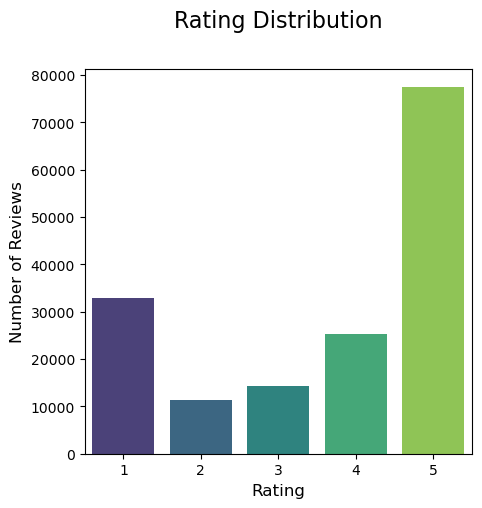

In [59]:
plt.figure(figsize=(5,5))
sns.countplot(x='Rating', data=df, palette='viridis', order=sorted(df['Rating'].unique()))
plt.title("Rating Distribution", fontsize=16, pad=30)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.show()

#### Sampling the values of "rating" to a proportion of :
#### 1 star --> 10% of total sample
#### 2 star --> 15% of total sample
#### 3 star --> 25% of total sample
#### 4 star --> 30% of total sample
#### 5 star --> 20% of total sample

In [38]:
total = len(df)
proportions = {1:0.10, 2:0.15, 3:0.25, 4:0.30, 5:0.20}

targets = {rating : int(total * p) for rating, p in proportions.items()}
print("Target Samples : ", targets)

Target Samples :  {1: 16130, 2: 24195, 3: 40325, 4: 48390, 5: 32260}


In [60]:
imbalanced_df = []

for rating, total_size in targets.items():
    sub_rating = df[df["Rating"] == rating]

    if len(sub_rating) >= total_size:
        sampled_df = sub_rating.sample(total_size, random_state=42)
    else:
        sampled_df = sub_rating.sample(total_size, replace=True, random_state=42)

    imbalanced_df.append(sampled_df)

new_imbalanced_df = pd.concat(balanced_df)

In [61]:
new_imbalanced_df["Rating"].value_counts().sort_index()

Rating
1    16130
2    24195
3    40325
4    48390
5    32260
Name: count, dtype: int64

C:\Users\joelk\AppData\Local\Temp\ipykernel_5236\4253510865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=new_imbalanced_df, palette='viridis', order=sorted(new_imbalanced_df['Rating'].unique()))


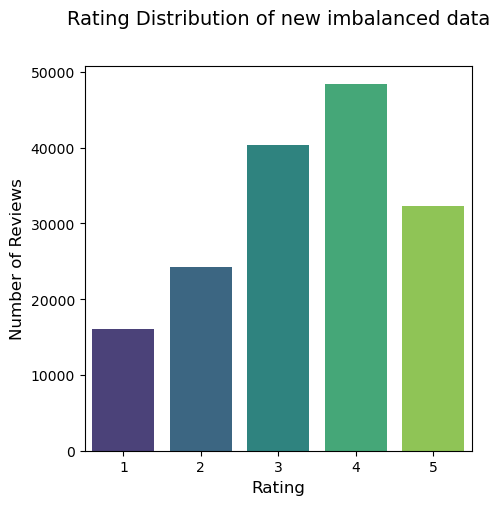

In [62]:
plt.figure(figsize=(5,5))
sns.countplot(x='Rating', data=new_imbalanced_df, palette='viridis', order=sorted(new_imbalanced_df['Rating'].unique()))
plt.title("Rating Distribution of new imbalanced data", fontsize=14, pad=30)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.show()

In [67]:
df['Rating'].value_counts().sort_index()

Rating
1    32862
2    11385
3    14272
4    25327
5    77455
Name: count, dtype: int64

In [68]:
new_imbalanced_df['Rating'].value_counts().sort_index()

Rating
1    16130
2    24195
3    40325
4    48390
5    32260
Name: count, dtype: int64